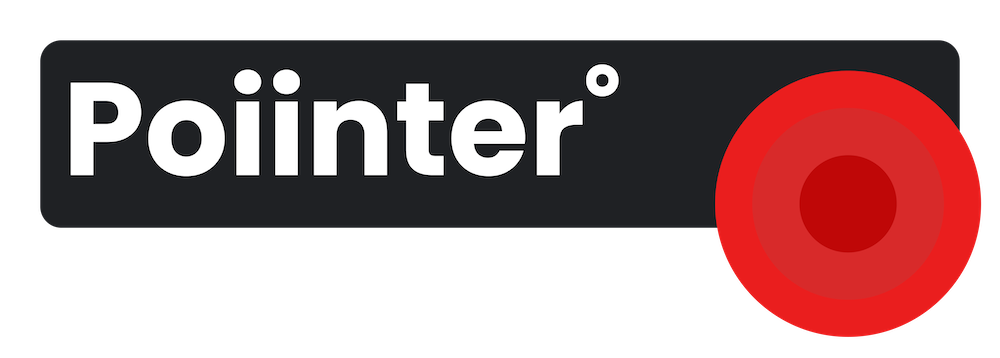

# Poiinter˚

This research project aims to apply deep learning techniques to interpret pose data, focusing on PoseNet output. The main goal of this project is to train a deep learning network to accurately determine the direction and point a person is pointing based on pose data.

The project is part of an AI research assignment in the Master Data Driven Design course: Fundamentals of Machine Learning. This assignment aims to explore and experiment with deep learning methods to gain a deeper understanding of their capabilities and limitations.

The inspiration behind this project is to improve natural interactions in space by using pose data. The ability to accurately determine the pointing direction can have many applications in human-computer interaction. This project is a prototype/experiment, not a final product.


# Data

## Data Generation Process

A customized web tool was developed for data generation in this research project. The tool shows a red dot moving on a projection surface. During a recording session, the PoseNet data is linked to the x/y coordinates of this point. The data can be downloaded as a CSV file at the end of the recording session. This tool allows data to be recorded on monitors and various surfaces, such as large projections. The web tool was implemented using React and TensorflowJS.

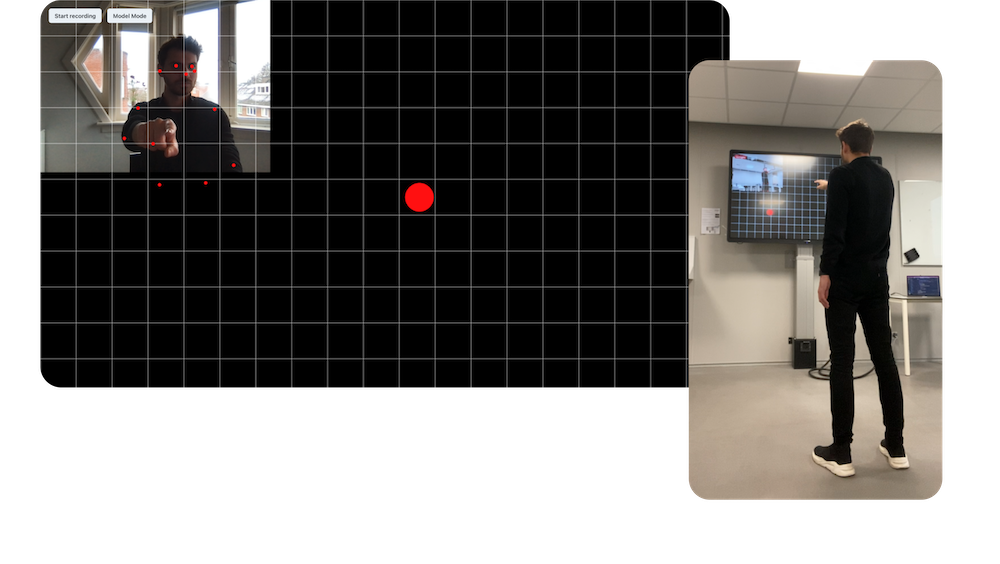

## Data Import

The recording sessions were conducted in controlled environments, specifically in rooms of HU, to ensure a high degree of reproducibility for potential demonstration purposes.

In [148]:
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/Poiinter/230112_BigMonitor_right_linebyline_center.csv")
df

,x,y,score,nose_x,nose_y,left_eye_x,left_eye_y,right_eye_x,right_eye_y,left_ear_x,...,right_hip_x,right_hip_y,left_knee_x,left_knee_y,right_knee_x,right_knee_y,left_ankle_x,left_ankle_y,right_ankle_x,right_ankle_y
0,40,50,0.559691,374.764986,128.093176,371.058102,119.202440,361.412249,118.904529,347.199373,...,313.255911,379.315796,398.682108,469.947824,302.075348,485.256672,388.192654,473.784256,374.387531,480.395966
1,80,50,0.527089,362.931843,130.411603,367.012809,121.443171,350.402694,117.929886,357.146247,...,311.538843,374.519971,402.881737,477.531356,298.982624,480.676776,379.255588,431.520846,310.688989,452.665769
2,120,50,0.613392,362.063044,136.208753,365.535620,128.447546,349.646853,124.433594,355.571278,...,311.368999,375.187707,401.603469,479.813888,298.790580,478.723002,380.971027,424.403921,310.574263,451.591290
3,160,50,0.647301,359.972417,136.358143,364.222433,128.639393,347.723855,124.478142,355.034228,...,314.204517,376.511255,401.625532,483.158055,297.959443,479.547926,391.083173,423.265842,310.898639,450.581983
4,200,50,0.640223,364.851768,143.070381,365.013942,135.081262,352.366950,131.009202,351.607295,...,315.811029,380.744642,399.681004,481.616637,301.074245,476.263651,388.682130,423.595055,312.850408,449.235416
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2898,760,50,0.619756,340.775713,168.059119,361.054194,139.436588,312.824656,142.691415,383.832964,...,248.682617,466.548383,363.953722,447.461851,232.590294,451.851789,360.395702,451.531201,260.237802,463.625551
2899,800,50,0.596481,342.190506,152.707964,362.178760,122.834012,310.356006,125.532145,383.611128,...,238.705668,465.784092,386.158057,461.892505,218.490967,466.773899,372.628107,428.264477,12.333569,14.545566
2900,840,50,0.651246,346.388042,139.959822,365.599507,109.187333,311.427261,111.096334,383.398047,...,245.192527,473.623718,436.074377,469.771923,200.474639,475.102788,361.875876,454.964047,337.008352,463.694504
2901,880,50,0.631737,357.678411,103.426088,374.953667,73.152693,319.160072,74.169653,383.040839,...,246.714288,469.592664,449.125176,470.749174,177.436421,467.983258,332.226153,460.657039,322.286529,464.855795


## Data Cleaning


Because the data collection for this research project was done with a custom tool, the data was collected in an appropriate format from the start. This minimized the need for extensive data cleaning and pre-processing.

### Filter for upper body keypoints

The application captures all of Posenet's keypoints, allowing for flexibility in future experiments. But the focus for this initial version was narrowed down to the upper body keypoints, as these are primarily used for pointing and thus minimizing noise in the model.

In [149]:
# Select just upper body keypoints
df = df.iloc[:, 0:25]
df

,x,y,score,nose_x,nose_y,left_eye_x,left_eye_y,right_eye_x,right_eye_y,left_ear_x,...,right_shoulder_x,right_shoulder_y,left_elbow_x,left_elbow_y,right_elbow_x,right_elbow_y,left_wrist_x,left_wrist_y,right_wrist_x,right_wrist_y
0,40,50,0.559691,374.764986,128.093176,371.058102,119.202440,361.412249,118.904529,347.199373,...,309.163890,169.577279,379.254818,267.358332,411.237822,143.232021,481.887865,101.901748,482.072058,102.156129
1,80,50,0.527089,362.931843,130.411603,367.012809,121.443171,350.402694,117.929886,357.146247,...,304.428613,171.141640,375.247015,280.652291,401.695980,142.657177,381.260455,347.502723,467.061891,99.132072
2,120,50,0.613392,362.063044,136.208753,365.535620,128.447546,349.646853,124.433594,355.571278,...,305.145877,172.900383,375.839928,289.778223,408.696497,135.059536,389.084944,375.019620,463.067252,97.444092
3,160,50,0.647301,359.972417,136.358143,364.222433,128.639393,347.723855,124.478142,355.034228,...,306.526753,174.181501,374.724717,293.953567,405.846114,140.964114,392.093449,383.502758,462.581847,101.123556
4,200,50,0.640223,364.851768,143.070381,365.013942,135.081262,352.366950,131.009202,351.607295,...,309.968890,175.659020,376.862710,292.614646,408.897689,141.159240,393.829514,380.966344,463.858881,105.614654
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2898,760,50,0.619756,340.775713,168.059119,361.054194,139.436588,312.824656,142.691415,383.832964,...,257.048400,268.754194,401.242279,312.960765,238.056867,418.787922,404.887319,393.706597,290.006103,456.341580
2899,800,50,0.596481,342.190506,152.707964,362.178760,122.834012,310.356006,125.532145,383.611128,...,244.510069,266.327761,400.398947,299.443563,218.775329,423.550036,405.051161,378.807154,299.799104,453.588616
2900,840,50,0.651246,346.388042,139.959822,365.599507,109.187333,311.427261,111.096334,383.398047,...,238.193710,258.926301,400.363393,304.839288,205.298039,421.262365,406.000677,386.024907,182.760632,467.791597
2901,880,50,0.631737,357.678411,103.426088,374.953667,73.152693,319.160072,74.169653,383.040839,...,226.240509,238.455157,403.432121,297.996934,187.572784,409.758387,417.817985,379.672549,148.976933,462.127543



### Check Scores

The output of the pose detector contains a score indicating the degree of confidence in the prediction. Despite some outliers in the data set, I decided to retain them in the data set for training the model. This decision was based on the consideration that there may be variations in light and motion in real-world scenarios that could introduce noise into the data. Keeping data with lower values (0.45+ is also not so bad) in the dataset will allow the model to learn to deal with such edge cases and noise, hopefully increasing its robustness and effectiveness in live applications.

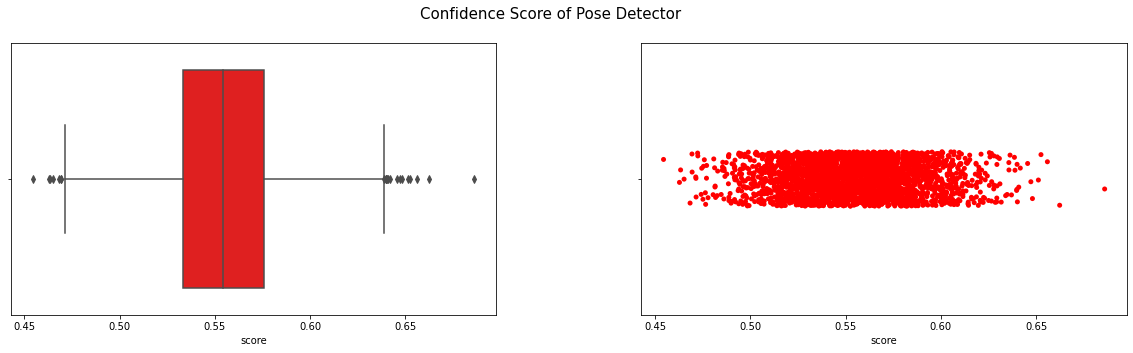

In [150]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create two columns
fig, axs = plt.subplots(1, 2, figsize=(20,5))
plt.subplots_adjust(wspace=0.3)

# Create a box plot and a strip plot for the scores
sns.boxplot(data=df, x='score', y=None, ax=axs[0], color='red')
sns.stripplot(data=df, x='score', y=None, jitter=True, ax=axs[1], color='red')

# Add labels and show the plot
plt.suptitle("Confidence Score of Pose Detector", fontsize=15)
plt.show()

## Data Analysis

In the data analysis, I would like to check the correctness and adequacy of the data and if there are any correlations.


### Pose Data Check

This plot is to see if the keypoints have arrived correctly in the CSV. From the perspective of the camera, this data is plausible.

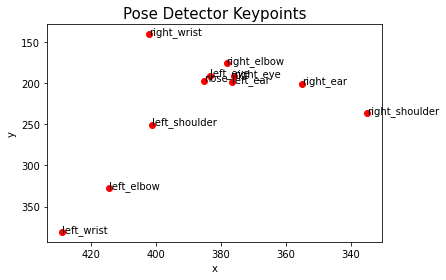

In [151]:
# All keypoints and specific point in time
keypoints = df.iloc[:, 3:]
frame = 1000

# Plot the keypoints
for i in range(0, keypoints.shape[1], 2):
    plt.scatter([keypoints.iloc[frame, i]], [keypoints.iloc[frame, i+1]], c='r', marker='o')
    plt.text(keypoints.iloc[frame, i], keypoints.iloc[frame, i+1], keypoints.columns[i][:-2])

# Flip the axis to make sense from camera perspective
ax = plt.gca()
ax.set_ylim(ax.get_ylim()[::-1])
ax.set_xlim(ax.get_xlim()[::-1])


# Add labels and show the plot
plt.title("Pose Detector Keypoints", fontsize=15)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

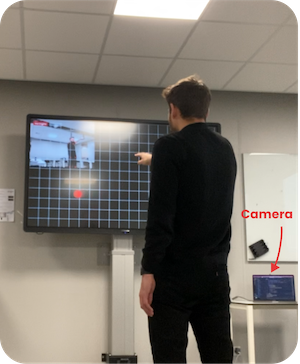

### Checking the movement pattern of the dot

Initially, the movement of a point across a projection surface was random, and analysis of the resulting data revealed an uneven distribution. 
To fix this, the movement of the point was converted into a linear pattern, resulting in a more balanced data distribution.



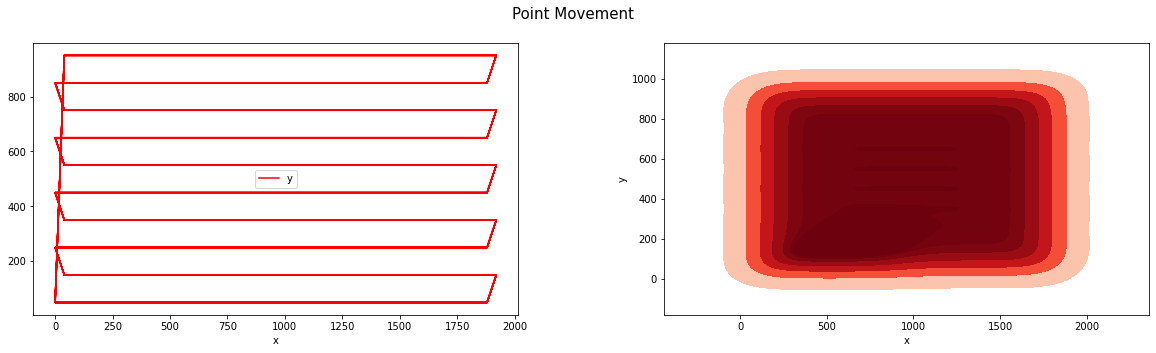

In [152]:
# Create two columns
fig, axs = plt.subplots(1, 2, figsize=(20,5))
plt.subplots_adjust(wspace=0.3)

# Set the x and y data
x = df['x']
y = df['y']

# Create the plot of the movement of the point
df.plot(x='x', y='y', kind='line', ax=axs[0], color='red')

# A kernel density plot to show the 
sns.kdeplot(df['x'], y=df['y'], cmap="Reds", shade=True, thresh=0.05, ax=axs[1])

# Add labels and customize the plot
plt.suptitle("Point Movement", fontsize=15)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### Correlations

The analysis of the heatmap graph shows some correlations between the coordinate of the point and the coordinates of the keypoints of the Pose detector. We can see that my face intuitively looks at the point, which leads to positive correlations with the y-coordinate of the point. However, there is a negative correlation with the x-coordinate. The left shoulder, right elbow, and wrist have a strong positive correlation, which makes sense since I am pointing with my right hand. Overall, the analysis of this heatmap diagram looks promising that the model can learn these correlations and predict the x and y coordinates of the point pointed.

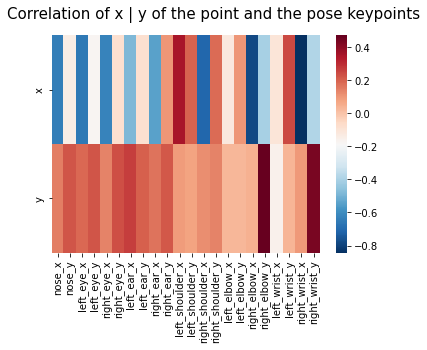

In [153]:
corr = df.corr()
# Draw heatmap of correlations
sns.heatmap(corr.iloc[:2, 3:], cmap='RdBu_r')

# Add labels and customize the plot
plt.suptitle("Correlation of x | y of the point and the pose keypoints", fontsize=15)
plt.show()

## Prepare Data

Splitting the data into a training set and a test set allows a more accurate evaluation of the model's performance. Especially since this model targets real-world scenarios, so the performance of the predictions for new, unseen data is essential.

I opted for the usual test size of 30% as I think this allows for a good representation of the unseen data while still leaving a significant amount of data to train the model on. Since there will also be a real-world evaluation with the data-gathering tool, this is sufficient for now.

In [154]:
import numpy as np
from sklearn.model_selection import train_test_split

X = df.iloc[:, 3:]
y = df.iloc[:, :2]

# Split test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Model

I used a strategy to find an optimal model that involved competition between multiple models. The process consisted of three models competing in each round, with each model having its own set of adjusted parameters, such as the number of layers, activation functions, stack size, kernel regulators, and optimizers.

After each round, the models were evaluated and compared. The model that performed best in "accuracy", "loss", and "mean absolute error" then advanced to the next round. In addition, I paid attention to the specific parameters that led to improved performance to develop the next generation of models. These two new models then consisted of modifications to the previous round's winner and a more extreme variant of the model.

This iterative approach allowed for systematic exploration and identification of the model's specific features, leading to improved performance. This way, an "optimal" model for the task could be found.

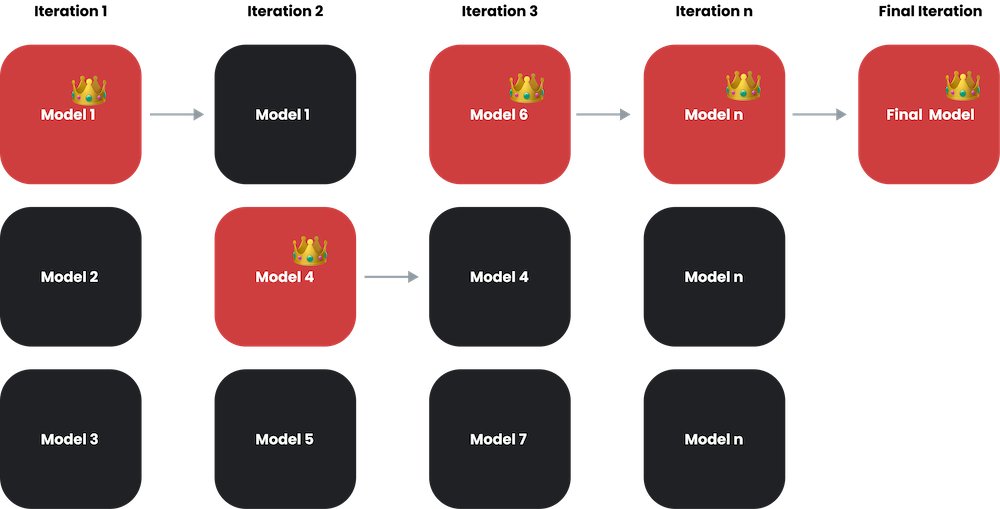

In developing my model, I choosed a basic model architecture as the start that is well suited for regression tasks since the goal is to predict a continuous value. I used multiple dense layers with decreasing numbers of units to extract the essential features of the input data to improve its performance.

I started with the ReLU as an activation function widely used in Deep Learning. The reason is that it is a simple function that can significantly reduce training time. I also experimented with other activation functions, but the ReLU prevailed.

Another important consideration was the issue of overfitting. I used regularization techniques to address this issue, particularly the "kernel_regularizer".  

I also experimented with different numbers of epochs, i.e., the number of training runs of the model on the data. I found that as the number of epochs increases, the model improves, but at the same time, the probability of overfitting increases. As a compromise, I settled on a value of 500 epochs with a batch size of 32, which balances training time and performance.

I tested RMSprop as an optimizer for my model, which gave me a good performance boost.

## Build Model

In [155]:
import tensorflow as tf
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.metrics import RootMeanSquaredError
from keras.regularizers import l2
from tensorflow.keras.layers.experimental.preprocessing import Normalization

In [156]:
# Check if GPU Support
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [157]:
# Create RMSE and R2 as metric
# !pip install tensorflow-addons
import tensorflow_addons as tfa
r_square = tfa.metrics.r_square.RSquare()
rmse = tf.keras.metrics.RootMeanSquaredError()

In [158]:
# Run with GPU
with tf.device('/cpu:0'):
  # Normalization of test and training data
  normalizer = Normalization()
  X_train_nor = normalizer(X_train)
  X_test_nor = normalizer(X_test)

  # Building Sequential Model
  model = Sequential()
  model.add(Dense(128, input_dim=22, activation='relu', kernel_regularizer=l2(0.01)))
  model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01)))
  model.add(Dense(32, activation='relu', kernel_regularizer=l2(0.01)))
  model.add(Dense(16, activation='relu', kernel_regularizer=l2(0.01)))
  model.add(Dense(8, activation='relu', kernel_regularizer=l2(0.01)))
  model.add(Dense(2))

  model.compile(loss='mean_squared_error', optimizer='rmsprop', metrics=['accuracy', rmse, r_square])

  history = model.fit(X_train_nor, y_train, epochs=500, batch_size=32, validation_data=(X_test_nor, y_test))

Epoch 1/500
64/64 [==============================] - 1s 7ms/step - loss: 232408.1406 - accuracy: 0.7411 - root_mean_squared_error: 549.6590 - r_square: -0.6996 - val_loss: 206672.5156 - val_accuracy: 0.7417 - val_root_mean_squared_error: 478.8994 - val_r_square: -0.2000
Epoch 2/500
64/64 [==============================] - 0s 3ms/step - loss: 184999.0625 - accuracy: 0.7411 - root_mean_squared_error: 463.9963 - r_square: -0.1351 - val_loss: 165937.9844 - val_accuracy: 0.7417 - val_root_mean_squared_error: 452.9584 - val_r_square: -0.0854
Epoch 3/500
64/64 [==============================] - 0s 3ms/step - loss: 166032.3438 - accuracy: 0.7411 - root_mean_squared_error: 444.1258 - r_square: -0.0550 - val_loss: 159875.2031 - val_accuracy: 0.7417 - val_root_mean_squared_error: 436.8017 - val_r_square: -0.0324
Epoch 4/500
64/64 [==============================] - 0s 3ms/step - loss: 150059.0312 - accuracy: 0.7411 - root_mean_squared_error: 430.7561 - r_square: -0.0166 - val_loss: 123758.8906 - v

In [159]:
model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_84 (Dense)             (None, 128)               2944      
_________________________________________________________________
dense_85 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_86 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_87 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_88 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_89 (Dense)             (None, 2)                 18        
Total params: 13,962
Trainable params: 13,962
Non-trainable params: 0
_________________________________________________

## Evaluate Model



### Validate Model with Root Mean Square Error

The RMSE decreases over the training time, which is a good sign. After 200 epochs, the curve flattens out; at 500 epochs, we are at about 200-210. So the prediction is off by about 200 pixels, which is not perfect, but kind of ok, depending on the resolution/actual projection area, as we will see later in the real-world evaluation.

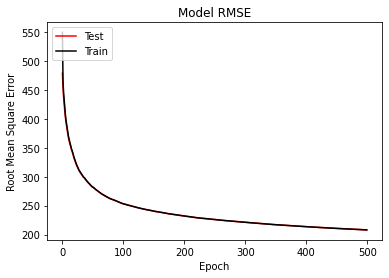

In [160]:
# Compare MSE Performance 
plt.plot(history.history['val_root_mean_squared_error'], color="red")
plt.plot(history.history['root_mean_squared_error'], color="black")
plt.title('Model RMSE')
plt.ylabel('Root Mean Square Error')
plt.xlabel('Epoch')
plt.legend(['Test', 'Train'], loc='upper left')
plt.show()

In [161]:
# get rmse value
rmse = history.history['val_root_mean_squared_error'][-1]
print('RSME: ' + str(rmse))

RSME: 208.0238037109375


### Validate Model with r2

The R2 value is quite good at 0.69, which tells me that my model can explain a good portion of the variance. This might have something to do with the correlations I found earlier. You can also quickly see from the graph that the R2 increases rapidly after only a few epochs.

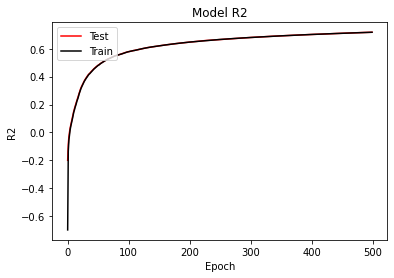

In [162]:
# Compare R2 Performance 
plt.plot(history.history['val_r_square'], color="red")
plt.plot(history.history['r_square'], color="black")
plt.title('Model R2')
plt.ylabel('R2')
plt.xlabel('Epoch')
plt.legend(['Test', 'Train'], loc='upper left')

plt.show()

In [163]:
# get r2 value
r2 = history.history['val_r_square'][-1]
print('R2: ' + str(r2))

R2: 0.7186368703842163


### Validate model with y-y plot on full data

In the scatter plot of actual versus predicted values of the x-coordinate, there appears to be a systematic bias in the model's prediction for points located at the top of the projection surface, where the model tends to predict them further down. Conversely, the model tends to predict higher up for points located at the bottom of the projection surface.

Similarly, there is a systematic bias in the model's prediction of y-coordinates for points located at the top of the projection surface, where it tends to predict them further down. However, the model's predictions appear opposite at the bottom of the projection surface.

In [172]:
def add_predictedXY(row):
  X = row[3:].values
  input = tf.reshape(X, (1, 22))
  input = normalizer(input)
  prediction = model.predict(input)
  row['X_pred'] = prediction[0][0]
  row['Y_pred'] = prediction[0][1]
  return row

df = df.apply(add_predictedXY, axis=1)

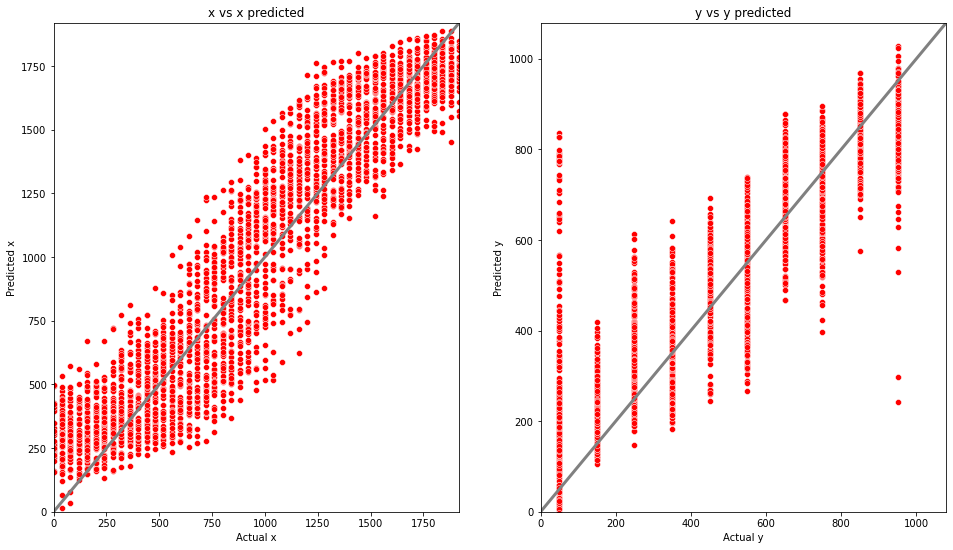

In [173]:
fig, axs = plt.subplots(1, 2, figsize=(16,9))

sns.scatterplot(data=df, x ='x', y = 'X_pred', color="red", ax=axs[0])
axs[0].set_title("x vs x predicted")
axs[0].set_xlabel('Actual x')
axs[0].set_ylabel('Predicted x')
axs[0].set_xlim([0,1920])
axs[0].set_ylim([0,1920])
axs[0].plot([0, 1920], [0, 1920], color='gray', lw=3)


sns.scatterplot(data=df, x = 'y', y = 'Y_pred', ax=axs[1], color="red")
axs[1].set_title("y vs y predicted")
axs[1].set_xlabel('Actual y')
axs[1].set_ylabel('Predicted y')
axs[1].set_xlim([0,1080])
axs[1].set_ylim([0,1080])
axs[1].plot([0, 1080], [0, 1080], color='gray', lw=3)
plt.show()

### Real Life Validation

When validated in practice, the model's performance is not random and appears to be able to trend in the intended target direction. Although there is some variability in the predicted point, this variability is less significant when the model is trained on a larger projection surface.


<img src="https://brandlmax.com/_persist/Result.gif">

## Export Model

To include my model in the web application, I need to export it here and then convert it to a JSON format on the computer so that TensorflowJS can read it.

In [167]:
import tensorflow as tf
from datetime import datetime

# Get the current date and time
now = datetime.now()
date_time_string = now.strftime('%Y%m%d-%H%M')
print(date_time_string)

# Save the model
save_dir = '/content/drive/MyDrive/Poiinter/export/' + date_time_string + '_model'
tf.saved_model.save(model, save_dir)
save_dir = '/content/drive/MyDrive/Poiinter/export/' + date_time_string + '_model.h5'
model.save(save_dir)

20230122-1724


# Conclusion

The summary observation suggests that the model captures the underlying relationship between the pose and the predicted point to some degree. Further experiments and larger data sets with different positions and left-handed data would be needed to confirm this hypothesis satisfactorily and to determine to what extent the model's performance can be improved. Also, a solution with feature extraction would be an exciting follow-up to calibrate new positions and surroundings more quicker.

This project allowed me to learn and test deep learning techniques. Despite the time constraints, I was able to make significant progress in understanding the underlying concepts and methods and gain experience implementing and optimizing deep learning models. Through the process of reading and experimenting, I was able to develop a deeper understanding of the various parameters and how they affect the performance of the model. I feel more confident in my ability to solve problems using Deep Learning, even though some cause-effect relationships still seem random to some degree.